In [13]:
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. 数据准备和预处理
texts = ['hello','fuck','son of bitch','I love this product', 'This is horrible', 'Great experience', 'Terrible service','fuck you','you idiot', 'hi', 'shit', 'go to hell', 'This is amazing', 'What a waste of money', 'Best purchase ever', 'Rude staff', 'screw you', 'you rock', 'good morning', 'damn', 'eat shit', 'This is fantastic', 'This is garbage', 'Very satisfied', 'Bad customer service', 'fuck yourself', 'you are funny','bitch','you die'] # 弹幕文本列表 
labels =[0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1] # 弹幕类别列表（0表示正常，1表示不良）

# 2. 特征提取和向量化
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(texts)

# 3. 数据划分
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 4. 模型训练
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# 5. 模型评估
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [19]:
# 6. 弹幕分类与审核
new_text = ['Wonderful','aboslutely','good','bad','fuck you man','fuck','damn','you bitch','shit you']  # 新的弹幕文本
new_text_features = vectorizer.transform(new_text)
predicted_label = svm.predict(new_text_features)

# 根据预测结果进行审核处理
for i in range(len(new_text)):
    if predicted_label[i] == 1:
        # 对不良弹幕进行相应处理，如屏蔽、标记或删除
        print("不良弹幕：", new_text[i])
    else:
        # 正常弹幕，通过审核
        print("正常弹幕：", new_text[i])

正常弹幕： Wonderful
正常弹幕： aboslutely
正常弹幕： good
正常弹幕： bad
不良弹幕： fuck you man
不良弹幕： fuck
不良弹幕： damn
不良弹幕： you bitch
不良弹幕： shit you


Accuracy: 0.6666666666666666


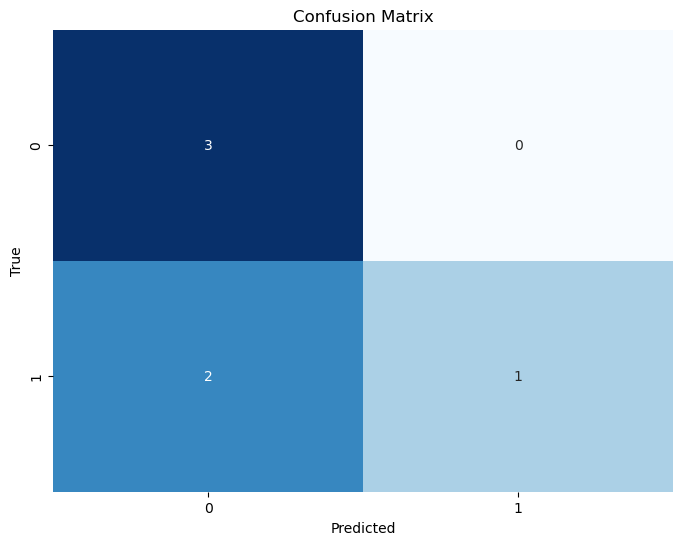

Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 模型评估
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 生成分类报告
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
